# Problem Statement : 
* The Apollo hosoital is interested in knowing which varibales are responsible for hospitalization charges across different regions and how does viral load, being a smoker, Severity level signifies hospitalization charges.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [3]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [4]:
df.describe(include = 'all' )

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [5]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

## Insights
* The data have 7 features and 1338 attributed.
* No missing values are present in the data.
* Most of the patients are male, most patients doesn't smoke.
* The median age is 39.
* Median viral load is nearly 10.
* The mean severity level is nearly 1

## Graphical Analysis

## Univariate analysis

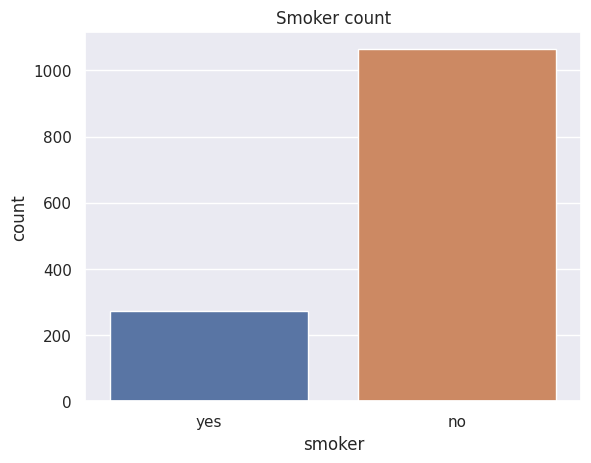

In [8]:
sns.countplot(x = df['smoker'])
plt.title('Smoker count')
plt.show()

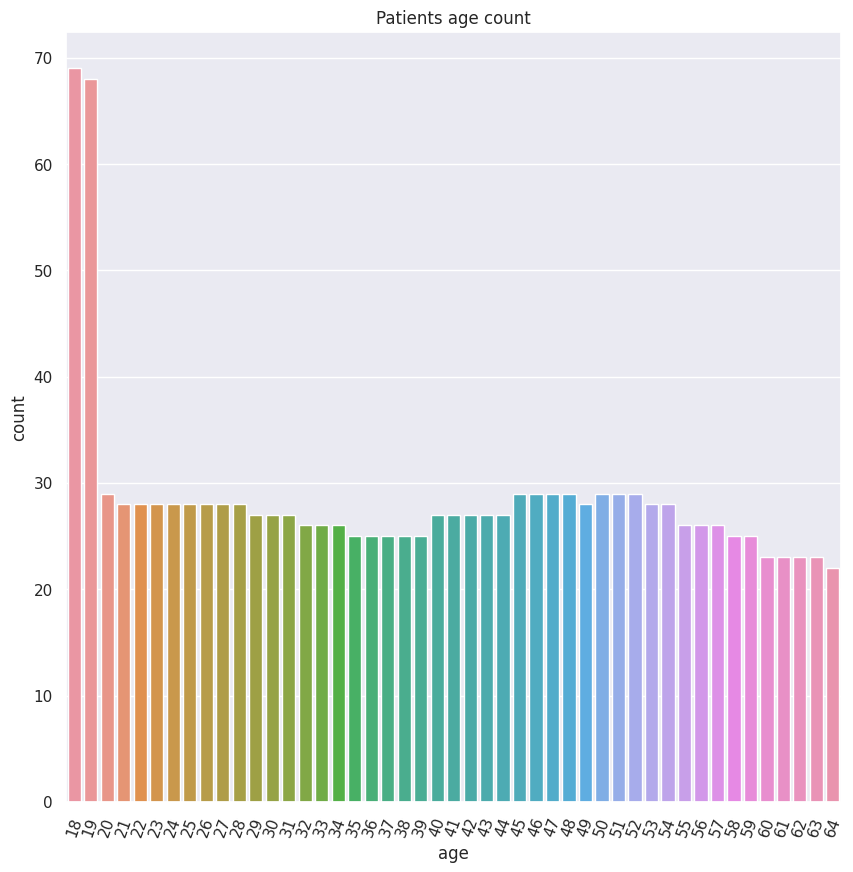

In [9]:
plt.figure(figsize = (10,10))
sns.countplot(x = df['age'])
plt.title('Patients age count')
plt.xticks(rotation = 70)
plt.show()

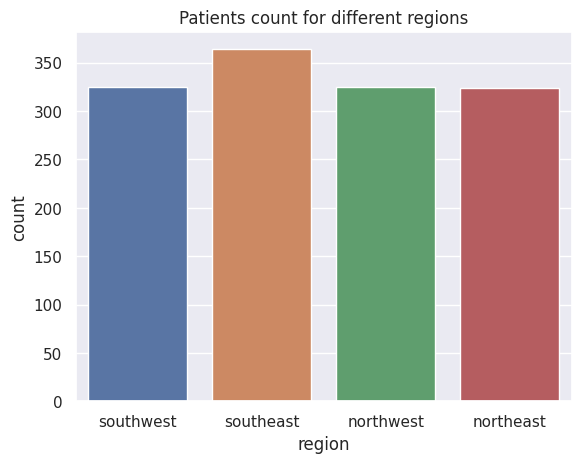

In [10]:
sns.countplot(x = df['region'])
plt.title('Patients count for different regions')
plt.show()

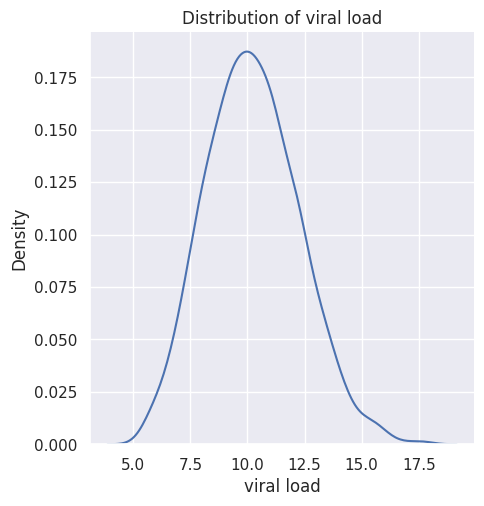

In [11]:
sns.displot(df['viral load'],kind='kde')
plt.title('Distribution of viral load')
plt.show()

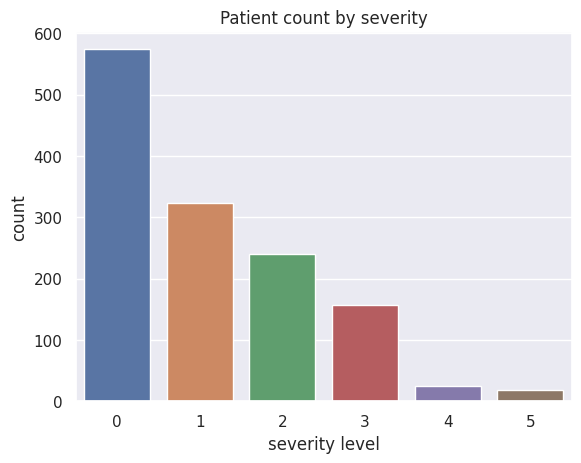

In [12]:
sns.countplot(x=df['severity level'])
plt.title('Patient count by severity')
plt.show()

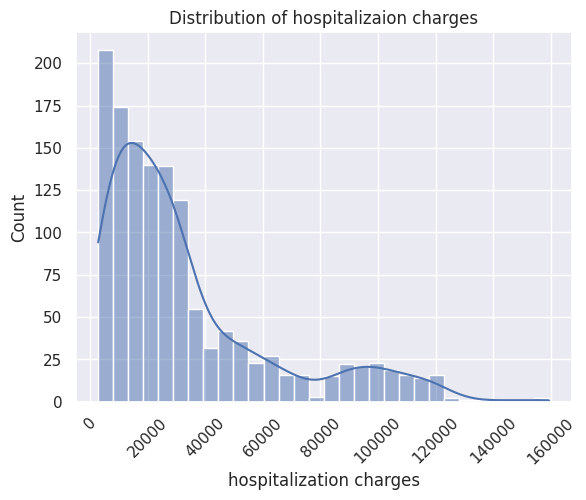

In [13]:
sns.histplot(df['hospitalization charges'],kde=True,)
plt.title('Distribution of hospitalizaion charges')
plt.xticks(rotation=45)
plt.show()

## Bivariate analysis

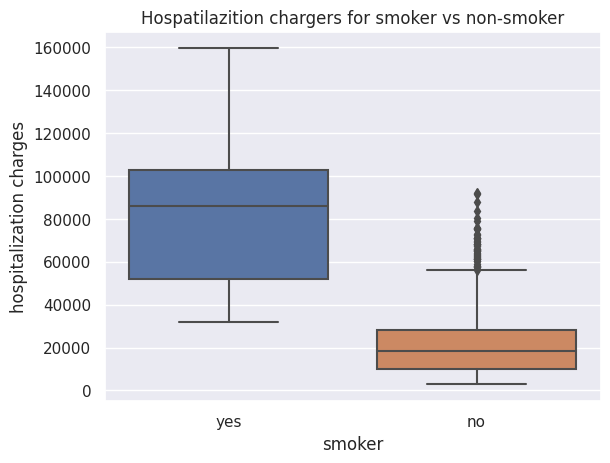

In [14]:
sns.boxplot(x='smoker',y='hospitalization charges',data=df)
plt.title('Hospatilazition chargers for smoker vs non-smoker')
plt.show()

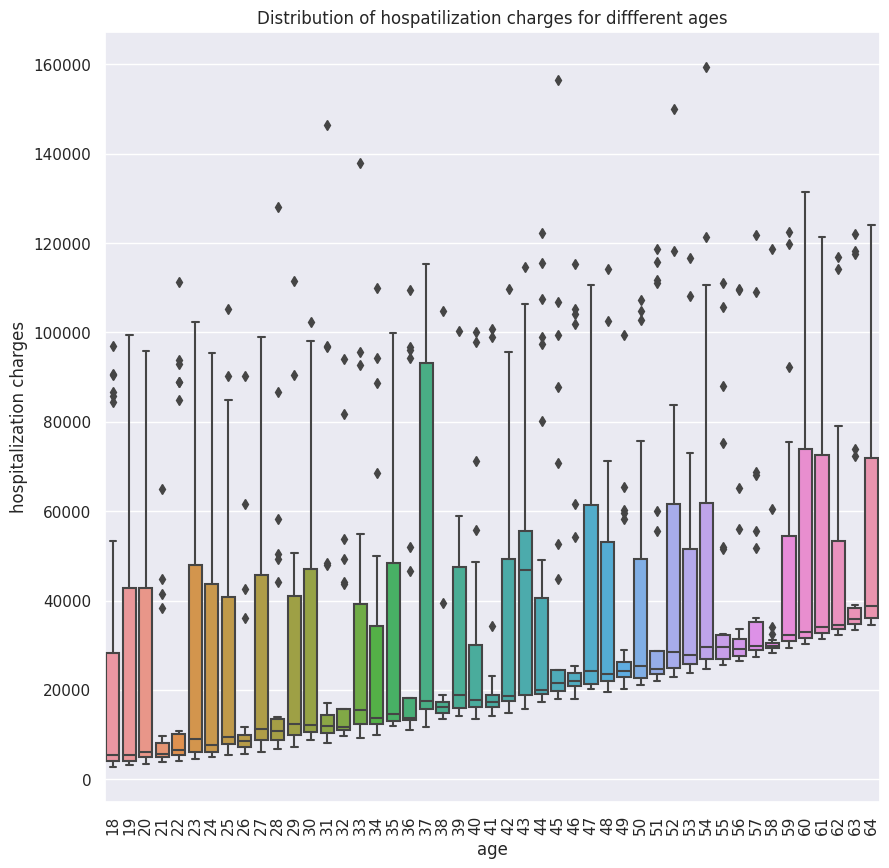

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age',y='hospitalization charges',data=df)
plt.title('Distribution of hospatilization charges for diffferent ages')
plt.xticks(rotation = 90)
plt.show()

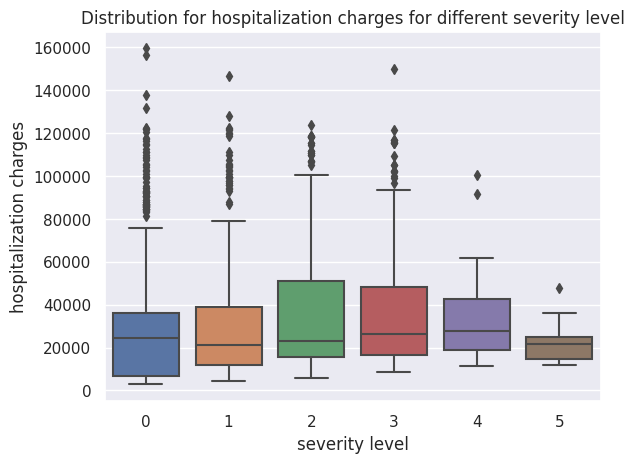

In [16]:
sns.boxplot(x='severity level',y='hospitalization charges',data=df)
plt.title('Distribution for hospitalization charges for different severity level')
plt.show()

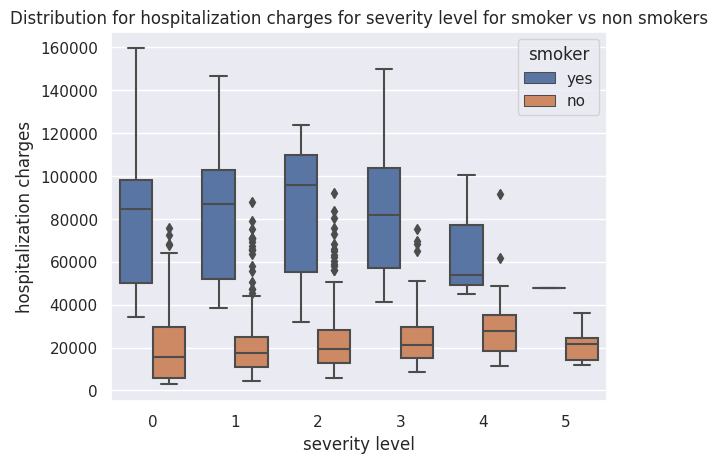

In [68]:
sns.boxplot(x='severity level',y='hospitalization charges',data=df, hue = 'smoker')
plt.title('Distribution for hospitalization charges for severity level for smoker vs non smokers')
plt.show()

[]

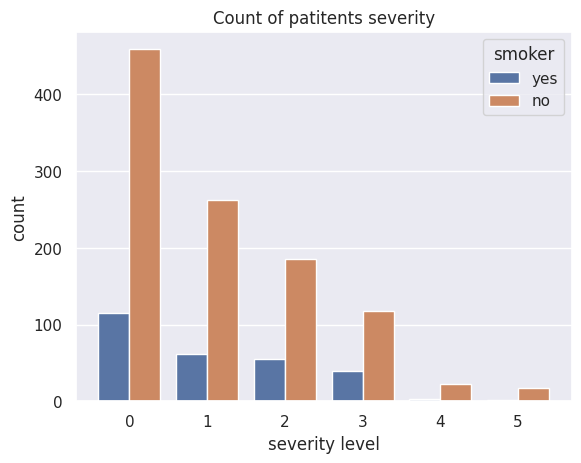

In [71]:
sns.countplot(x = 'severity level', hue = 'smoker', data = df)
plt.title('Count of patitents severity')
plt.plot()

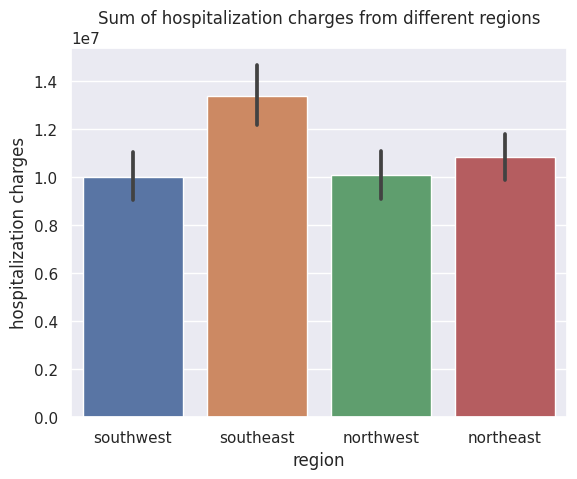

In [17]:
sns.barplot(x='region',y='hospitalization charges',data=df, estimator=np.sum)
plt.title('Sum of hospitalization charges from different regions')
plt.show()

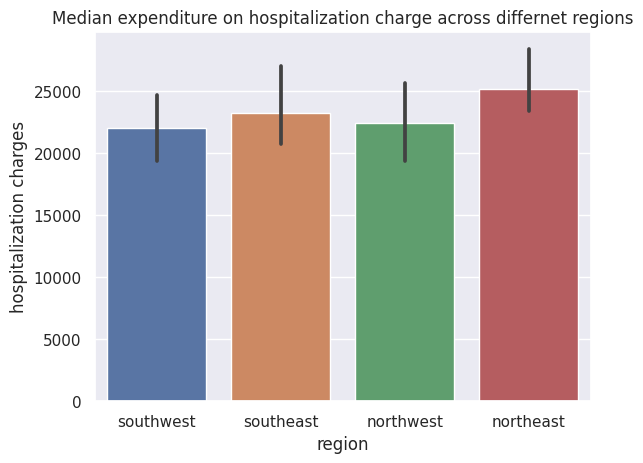

In [18]:
sns.barplot(x='region',y='hospitalization charges',data=df, estimator=np.median)
plt.title('Median expenditure on hospitalization charge across differnet regions')
plt.show()

/tmp/ipykernel_10280/3215561955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),cmap='Blues')


<AxesSubplot: >

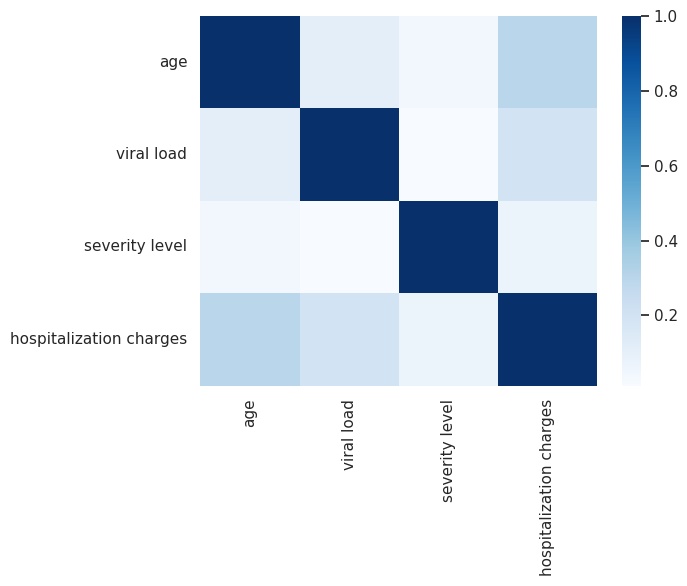

In [44]:
sns.heatmap(data=df.corr(),cmap='Blues')

## Insights:
* Most patients doesn't smokes.
* Except for group 18, 19, age is almost uniformly distributed.
* Region from where patients belongs to is also unifrom.
* The viral load is normally distributed.
* Most of the patients have selerity level 0 and is also decresing as we increase severity level.
* Hospitalization charges is right skewed.
* The median expenditure by patients who don't smoke is much lower than those who smokes.
* The minimum hospitalization charges for people who smokes is the same as the 75 percentile for hospitalizaion charges of the patient who does.
* There is a trend with the minimum hospitalization charges with age, as the age increase the minimum hospitalizaton charges also increase.
* The highest median expenditure by severity level is 3 and median expenditure by severity level is almost the same.
* The total revenue generated from southeast zone is highest but the median charges are highest from north east zone.
* No good co-relation has been found between the variables.

# Hypothesis Testing:

In [20]:
from statsmodels.stats import weightstats
from scipy import stats
import statsmodels.api as sm

## Does smokers pays more hospitalization charger than non-smokers?

## Assumptions for ttest
* Observation are greater than 30.
* Data is normally distributed

H0 --> null hypothesis,
H1 --> alternative hypothesis, 
aplha = 0.05
* H0 : mean charges of smoker <= mean charges of non-smoker
* H1 : mean charges of smoker > mean charges of non-smoker

In [21]:
smoker = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']

### Distribution of hospital charges for smokers and non smokers

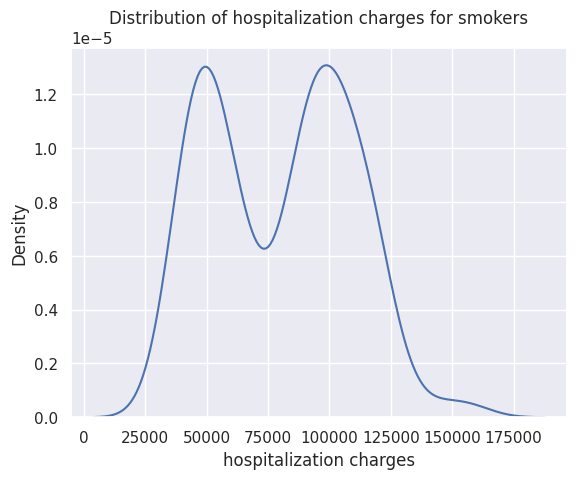

In [76]:
sns.kdeplot(smoker['hospitalization charges'])
plt.title('Distribution of hospitalization charges for smokers')
plt.show()

<AxesSubplot: xlabel='hospitalization charges', ylabel='Density'>

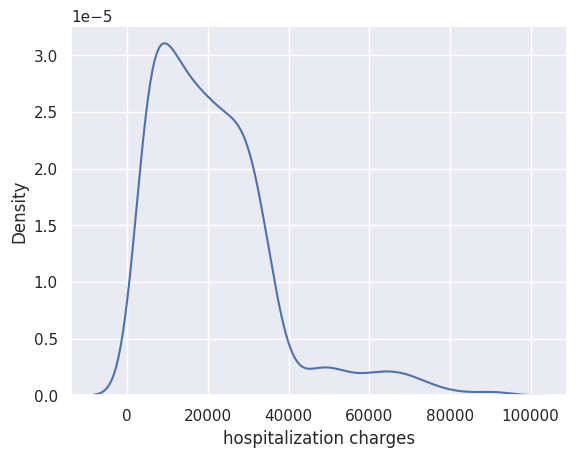

In [23]:
sns.kdeplot(non_smoker['hospitalization charges'])

### Test for normality

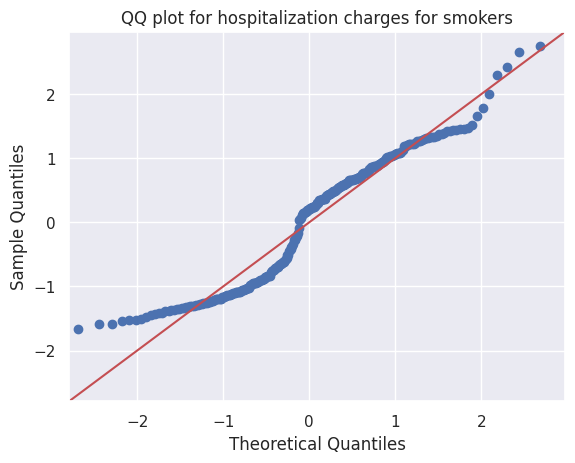

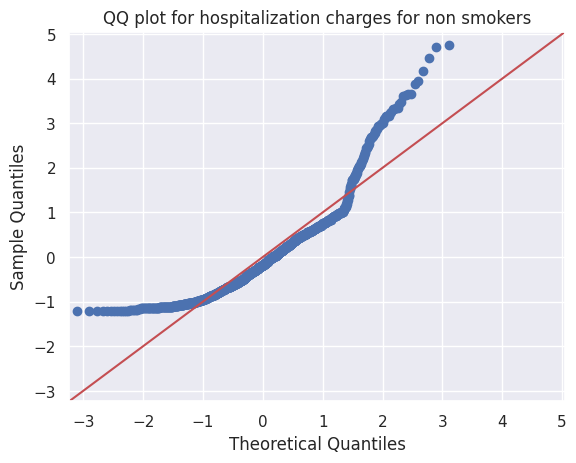

In [24]:
sm.qqplot(smoker['hospitalization charges'],line='45', fit=True)
plt.title('QQ plot for hospitalization charges for smokers')
plt.show()
sm.qqplot(non_smoker['hospitalization charges'],line='45', fit=True)
plt.title('QQ plot for hospitalization charges for non smokers')
plt.show()

In [25]:
t_stats, p_value, dof = weightstats.ttest_ind(smoker['hospitalization charges'],smoker['hospitalization charges'],alternative = 'larger')

In [26]:
p_value

0.5

### Insights
* As p_value is greater then significance level, we fail to reject null hypothesis.
* Although the data was not normally distributed we still perform the test meaning the accuracy of the test can be questioned.
* Also it is evidient from the test that hospitilization charges for people who smokes are higher then those who don't.

## Does Viral load for female is different from that of male?

## Assumptions for ttest
* Observation are greater than 30.
* Data is normally distributed

H0 --> null hypothesis,
H1 --> alternative hypothesis, 
aplha = 0.05
* H0 : mean viral load in female = mean viral load in male
* H1 : mean viral load in female != mean viral load in male

In [27]:
male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

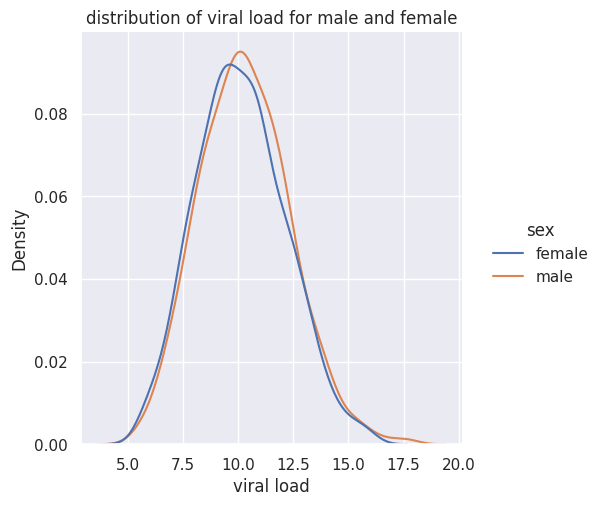

In [28]:
sns.displot(x = 'viral load', hue = 'sex', data = df,kind='kde')
plt.title('distribution of viral load for male and female')
plt.show()

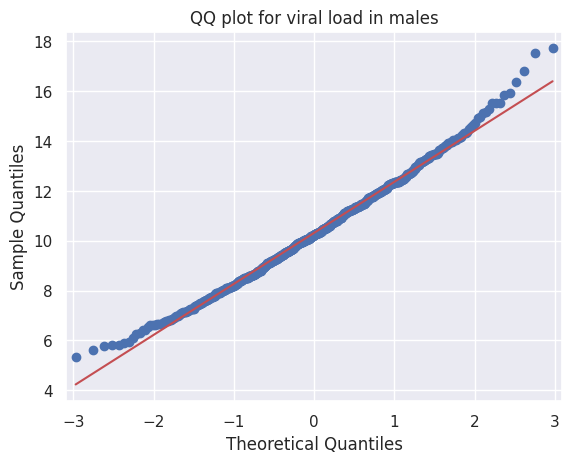

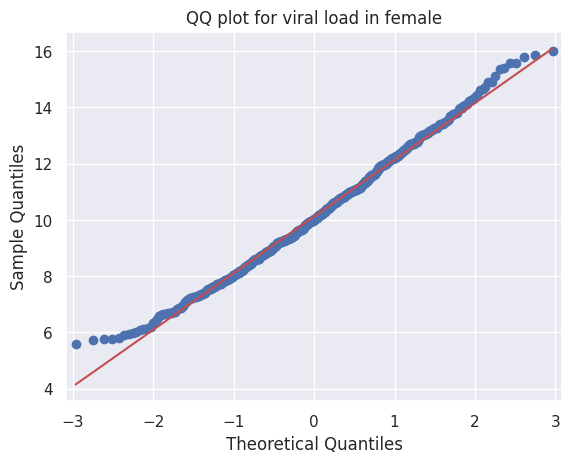

In [29]:
sm.qqplot(male['viral load'],line='s')
plt.title('QQ plot for viral load in males')
plt.show()

sm.qqplot(female['viral load'],line='s')
plt.title('QQ plot for viral load in female')
plt.show()

In [30]:
# Statistical Test
t_stats, p_value, dof = weightstats.ttest_ind(male['viral load'],female['viral load'])
p_value

0.09017358416701433

### Insights
* From the above ttest the pvalue comes out to be greater then significnace value(0.05) and hence we fail to reject our null hypothesis
* All the assumptions were also fulfilled.
* From the above test it is also evident that average viral load in females is same as average viral load in males

## Is the proprotion of smoking is different across regions?

### Assumptions for chi square test of independence:
* Frequency for every cell must be greater than 5.
* Variables are categorical.
* Observations must be independent.
* Cell in the contingency table must be mutually exclusive
    * All the above assumptions are true for our data 

H0 --> null hypothesis,
H1 --> alternative hypothesis, 
aplha = 0.05
* H0 : smokers are independent of region they live in.
* H1 : smoker are dependent of region they live in.

In [31]:
table = pd.crosstab(index=df['smoker'],columns=df['region'])

In [32]:
pvalue = stats.chi2_contingency(table)[1]
pvalue

0.06171954839170547

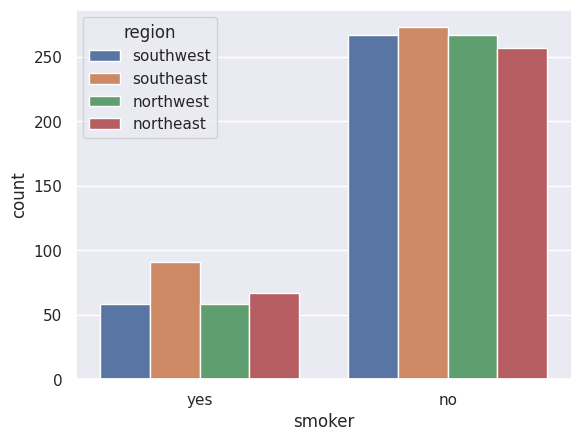

In [33]:
sns.countplot(x = df['smoker'],hue=df['region'])
plt.show()

### Insights
* As the pvalue is greater than significance level of 0.05, we fail to reject our null hypothesis and hence conclude being smoker is dependent of region.
* All the assumptions were also fulfilled meaning test has good accuracy.
* Final conclusion : smokers are dependent on region.

## Is the mean viral load for severity level 0, 1 and 2 is same?

H0 --> null hypothesis,
H1 --> alternative hypothesis, 
aplha = 0.05
* H0 : mean viral load for severity level 0, 1 and 2 is same
* H1 : atleast one of the mean viral load for severity level 0, 1 and 2 is different

### Checking the assumptions for anova
* viral load is normally distributed?
* Sample should be independent
* Variance should be equal

In [60]:
df_s = df[(df['severity level'] == 0) | (df['severity level'] == 1 ) | (df['severity level'] == 2)]

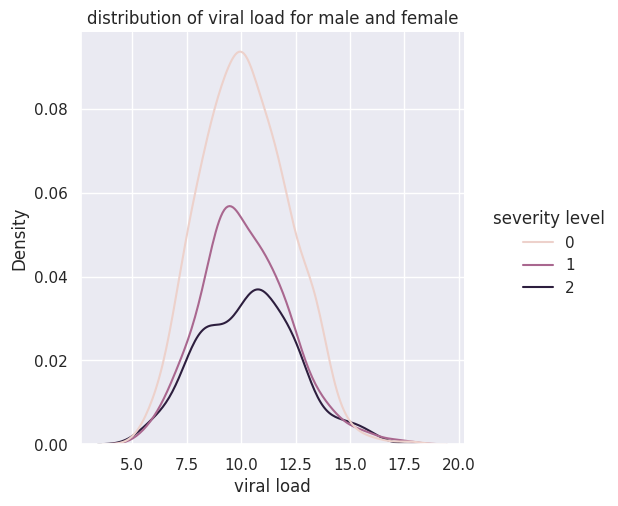

In [61]:
sns.displot(x = 'viral load', hue = 'severity level', data = df_s,kind='kde')
plt.title('distribution of viral load for male and female')
plt.show()

In [35]:
female_0 = female[female['severity level'] == 0]
female_1 = female[female['severity level'] == 1]
female_2 = female[female['severity level'] == 2]

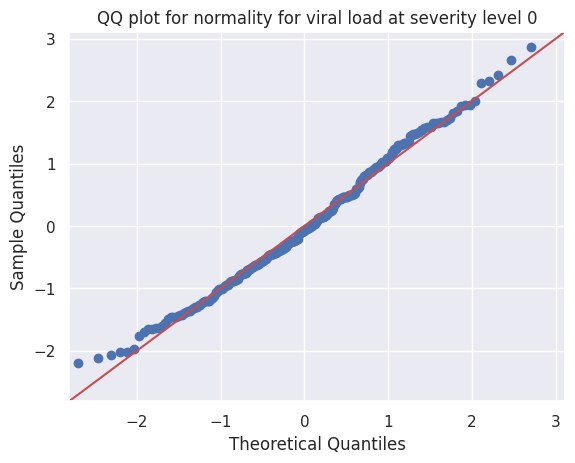

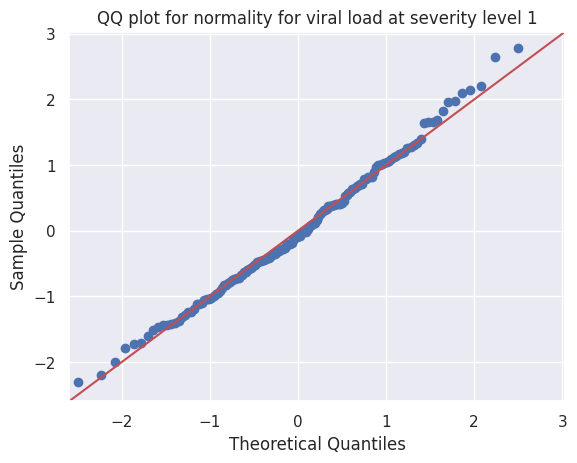

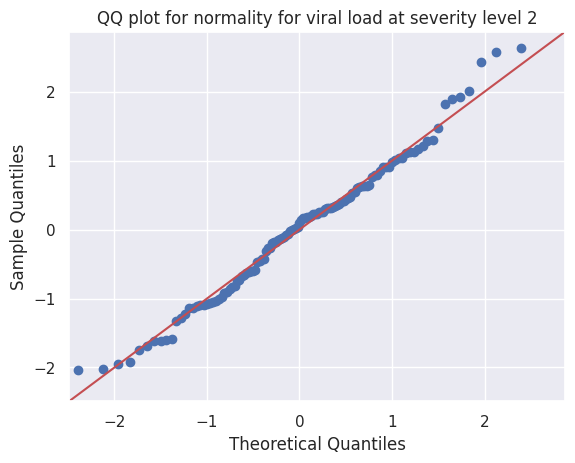

In [36]:
sm.qqplot(female_0['viral load'],line='45', fit=True)
plt.title('QQ plot for normality for viral load at severity level 0')
plt.show()

sm.qqplot(female_1['viral load'],line='45', fit=True)
plt.title('QQ plot for normality for viral load at severity level 1')
plt.show()

sm.qqplot(female_2['viral load'],line='45', fit=True)
plt.title('QQ plot for normality for viral load at severity level 2')
plt.show()

#### Checking variance

In [37]:
female_0['viral load'].var(),female_1['viral load'].var(),female_2['viral load'].var()

(3.9564046784890428, 3.7212929130049175, 4.8827151402934055)

* As the variance of viral load for different severity level is almost the same we continue our test.

In [38]:
# Actual test
pvalue = stats.f_oneway(female_0['viral load'],female_1['viral load'],female_2['viral load'])[1]
pvalue

0.7151189650367746

* As pvalue is much greater than 0.05 we fail to reject our null hypothesis and hence conclude that mean of viral load for severity level 0, 1 and 2 is same
* All the assumptions were also fulfilled meaning test has good accuracy.
* Final conclusion : mean of viral load for different severity level is same.

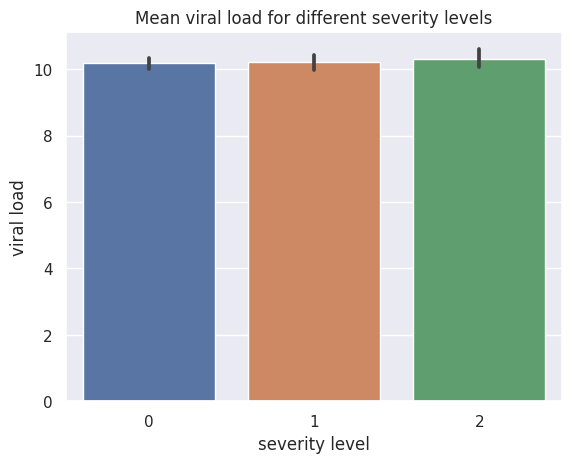

In [62]:
# Manually checking mean viral load
sns.barplot(x = 'severity level', y='viral load', data = df_s, estimator = np.mean)
plt.title('Mean viral load for different severity levels')
plt.show()

## Busniess Insights:
* Most patients doesn't smokes, but for those patients who does hopitalization charges are relatively very high.
* Except for group 18, 19, age is almost uniformly distributed. Region from where patients belongs to is also unifrom.
* The viral load is normally distributed meaning 63% patients will have viral load ranging between [8.2 and 12.5].
* Most of the patients have selerity level 0 and is also decresing as we increase severity level.
* Hospitalization charges is right skewed meaning small number of patients will tend to pay more hospitalization charges than others.
* The median expenditure by patients who don't smoke is much lower than those who smokes.
* The minimum hospitalization charges for people who smokes is the same as the 75 percentile for hospitalizaion charges of the patient who does.
* There is a trend with the minimum hospitalization charges with age, as the age increase the minimum hospitalizaton charges also increase.
* The highest median expenditure by severity level is 3 and median expenditure by severity level is almost the same.
* The total revenue generated from southeast zone is highest but the median charges are highest from north east zone.
* There is statistical evidance that those people who smokes pays more hospitalization charges.
* From statistical evidance it was found out that smokers are dependent on region, most smokers comes from southeast region.
* It is also evidant that mean viral load for different severity level is same, meaning having high severity level does not mean high viral load.
* Also there is not statistical evidance that mean viral load in male is different from that of females.

# Recommendation
* Those patients who smokes always pays more then those who doesn't meaning insurance schemes can be introduced to them.
* The above point can be missued, people intentionally degrading their body and putting load on insurance company might affect those companies, so prior to insurance helth and habits check up needs to be done.
* People coming from south-east zone tends to smoke higher then those who doesn't meaning their hospitalization charges will be more, insurance awareness campaign can be done in those reasons.
* There are very less people with high severity level so special treatment rooms can be reduced and there are alot of people with low severity level, so entry level treatments medication and equipments need to be stocked for them in bulk.
* Hospitalization charges are right skewed indicating the need and sprea of awareness of insurances.
* There was a increasing trend with age and minimum hospitalization charges, aid from government can be asked for older peoples as they are less financial source acitve.